In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read invivo/exvivo results

In [3]:
table_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/SCENIC_results/'

In [4]:
## read in vivo regulons
invivo = pd.read_csv(table_dir + 'Fibroblasts_SCENIC_scores_INVIVO_treatment.csv', index_col=0)
invivo.head(5)

,regulon,healthy,ILD
1,ADARB1_REG,0.217426,0.626712
2,ARID3A_REG,0.207040,0.441435
3,ARID5B_REG,0.123455,0.404050
4,ARNT_REG,0.236187,0.608514
5,ARNTL2_REG,0.201650,0.590878


In [5]:
## read in vivo regulons
exvivo = pd.read_csv(table_dir + 'Fibroblasts_SCENIC_scores_EXVIVO_treatment.csv', index_col=0)
exvivo.head(5)

,regulon,Fibrotic Cocktail,Control Cocktail
1,ADARB1_REG,0.369869,0.457981
2,AHCTF1_REG,0.339415,0.333424
3,AR_REG,0.022929,0.064193
4,ARID3A_REG,0.120192,0.188089
5,ARNT_REG,0.321046,0.380753


### Compute regulon log2FC

In [6]:
invivo['invivo_log2FC'] = np.log2(invivo['ILD']/invivo['healthy'])
exvivo['exvivo_log2FC'] = np.log2(exvivo['Fibrotic Cocktail']/exvivo['Control Cocktail'])

In [7]:
tab = invivo.merge(exvivo, left_on = 'regulon', right_on = 'regulon')

In [8]:
tab

,regulon,healthy,ILD,invivo_log2FC,Fibrotic Cocktail,Control Cocktail,exvivo_log2FC
0,ADARB1_REG,0.217426,0.626712,1.527278,0.369869,0.457981,-0.308274
1,ARID3A_REG,0.207040,0.441435,1.092292,0.120192,0.188089,-0.646079
2,ARNT_REG,0.236187,0.608514,1.365359,0.321046,0.380753,-0.246077
3,ATF1_REG,0.221468,0.629106,1.506201,0.404414,0.449948,-0.153927
4,ATF3_REG,0.202843,0.663600,1.709949,0.416462,0.464018,-0.155997
...,...,...,...,...,...,...,...
224,ZNF362_REG,0.213228,0.614023,1.525893,0.327708,0.386725,-0.238898
225,ZNF429_REG,0.205006,0.362220,0.821201,0.376972,0.443161,-0.233372
226,ZNF467_REG,0.199402,0.630407,1.660601,0.067398,0.060270,0.161271
227,ZNF607_REG,0.201245,0.558013,1.471345,0.259127,0.445088,-0.780430


In [9]:
conserved = tab[((tab['invivo_log2FC'] > 0) & (tab['exvivo_log2FC'] > 0)) | ((tab['invivo_log2FC'] < 0) & (tab['exvivo_log2FC'] < 0))]

In [10]:
conserved = conserved.set_index('regulon')

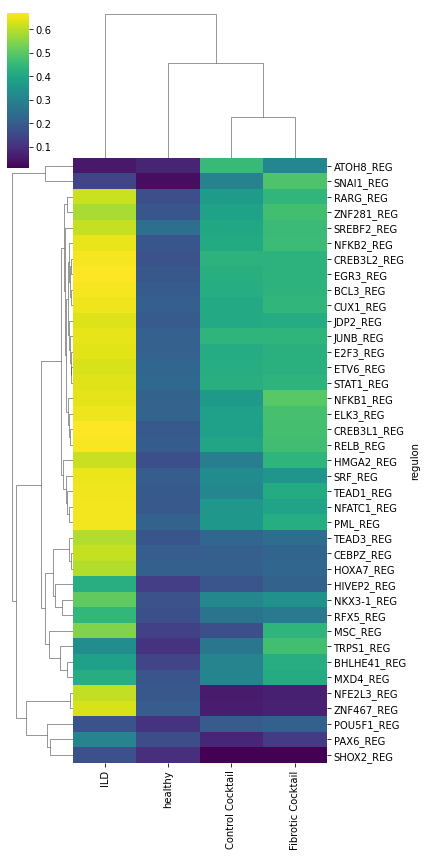

In [11]:
sb.clustermap(conserved[['Control Cocktail','Fibrotic Cocktail','healthy','ILD']], cmap = 'viridis', figsize = (6,12))

In [12]:
top25_invivo = tab.sort_values(by = 'ILD', ascending = False).head(40)['regulon'].to_list()
bottom25_invivo = tab.sort_values(by = 'healthy', ascending = True).tail(40)['regulon'].to_list()

In [13]:
top25_exvivo = tab.sort_values(by = 'Fibrotic Cocktail', ascending = False).head(40)['regulon'].to_list()
bottom25_exvivo = tab.sort_values(by = 'Control Cocktail', ascending = True).tail(40)['regulon'].to_list()

In [14]:
top_induced = np.intersect1d(top25_invivo, top25_exvivo)
top_healthy = np.intersect1d(bottom25_invivo, bottom25_exvivo)

In [15]:
induced_tab = tab[tab['regulon'].isin(top_induced)][['regulon','ILD','Fibrotic Cocktail']]
induced_tab

,regulon,ILD,Fibrotic Cocktail
4,ATF3_REG,0.663600,0.416462
8,BACH1_REG,0.647232,0.418465
10,BCL3_REG,0.659711,0.435088
21,CREB3L1_REG,0.669301,0.471611
22,CREB3L2_REG,0.659857,0.433548
27,CUX1_REG,0.653360,0.439397
36,EGR1_REG,0.659005,0.434467
38,EGR3_REG,0.666844,0.431658
43,ELK3_REG,0.653277,0.473015
134,NFKB2_REG,0.646862,0.458257


In [16]:
induced_tab_invivo = induced_tab[['regulon','ILD']]
induced_tab_invivo.rename(columns = {'ILD':'RSS'}, inplace = True)
induced_tab_invivo['condition'] = 'invivo - IPF'
induced_tab_invivo = induced_tab_invivo.sort_values(by = 'RSS', ascending = False)

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [17]:
induced_tab_exvivo = induced_tab[['regulon','Fibrotic Cocktail']]
induced_tab_exvivo.rename(columns = {'Fibrotic Cocktail':'RSS'}, inplace = True)
induced_tab_exvivo['condition'] = 'exvivo - FC'

In [18]:
conserved_induced = pd.concat([induced_tab_invivo, induced_tab_exvivo], axis=0)

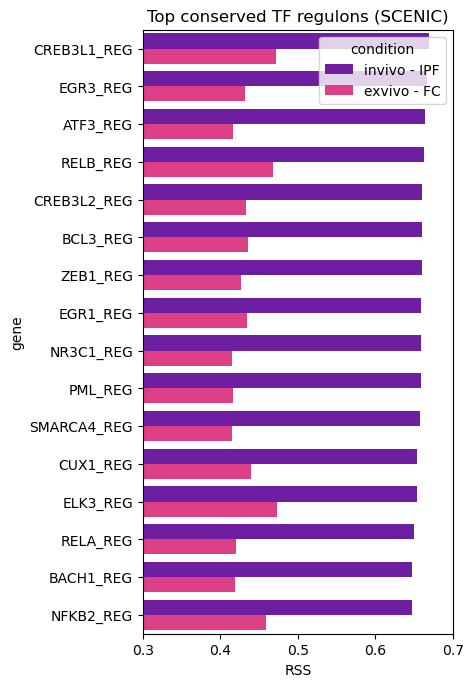

In [19]:
sb.barplot(data = conserved_induced,
           x = 'RSS',
           y = 'regulon',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved TF regulons (SCENIC)',
                xlabel = 'RSS',
                xlim = (0.3,0.7),
                ylabel = 'gene'
               )
plt.savefig(fig_dir + 'barplot_fibroblasts_conserved_TF_regulons_IPF.pdf')
plt.show()

In [20]:
bottom_tab = tab[tab['regulon'].isin(top_healthy)][['regulon','healthy','Control Cocktail']]
bottom_tab

,regulon,healthy,Control Cocktail
11,BCLAF1_REG,0.234752,0.470128
16,CEBPD_REG,0.224134,0.471436
26,CTCF_REG,0.222318,0.479841
51,ETV2_REG,0.230628,0.486208
54,ETV5_REG,0.227099,0.469884
59,FOS_REG,0.231787,0.467780
73,FOXQ1_REG,0.243071,0.469903
100,KDM5A_REG,0.233557,0.467354
112,MAFK_REG,0.225786,0.467840
123,MXI1_REG,0.241122,0.492591


In [21]:
bottom_tab_invivo = bottom_tab[['regulon','healthy']]
bottom_tab_invivo.rename(columns = {'healthy':'RSS'}, inplace = True)
bottom_tab_invivo['condition'] = 'invivo - healthy'
bottom_tab_invivo = bottom_tab_invivo.sort_values(by = 'RSS', ascending = False)

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [22]:
bottom_tab_exvivo = bottom_tab[['regulon','Control Cocktail']]
bottom_tab_exvivo.rename(columns = {'Control Cocktail':'RSS'}, inplace = True)
bottom_tab_exvivo['condition'] = 'exvivo - CC'

In [23]:
conserved_induced = pd.concat([bottom_tab_invivo, bottom_tab_exvivo], axis=0)

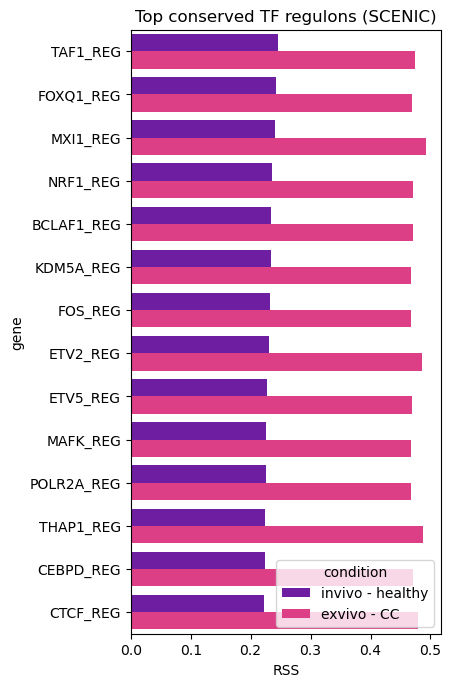

In [24]:
sb.barplot(data = conserved_induced,
           x = 'RSS',
           y = 'regulon',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved TF regulons (SCENIC)',
                xlabel = 'RSS',
                ylabel = 'gene'
               )
plt.savefig(fig_dir + 'barplot_fibroblasts_conserved_TF_regulons_healthy.pdf')
plt.show()